In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Import Wildfire Data and Create Fire Dataframe
fire_df = pd.read_csv("FL2.csv")


In [3]:
# Convert Lat/Long to String
fire_df['latitude'] = fire_df['latitude'].astype('str')
fire_df['longitude'] = fire_df['longitude'].astype('str') 

In [4]:
# Find all Unique Counties
#fire_df.county.unique()

In [5]:
# Check Data Types
fire_df.dtypes

fire_year          int64
district          object
unit              object
fire_number       object
fire_name         object
legal             object
latitude          object
longitude         object
fuel_model        object
county            object
report_date       object
general_cause     object
odf_acres        float64
total_acres      float64
dtype: object

In [6]:
# Alt Function to convert DMS to Decimal

#def dms_to_dd(d, m, s):
    #dd = d + float(m)/60 + float(s)/3600
    #return dd

# Converting Lat/Long DMS to Decimal
pattern = r'(?P<d>[\d\.]+).*?(?P<m>[\d\.]+).*?(?P<s>[\d\.]+)'

#Lat
dms = fire_df['latitude'].str.extract(pattern).astype(float)
fire_df['Latitude'] = dms['d'] + dms['m'].div(60) + dms['s'].div(3600)

#Long  
dms = fire_df['longitude'].str.extract(pattern).astype(float)
fire_df['Longitude'] = dms['d'] + dms['m'].div(60) + dms['s'].div(3600)

fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,latitude,longitude,fuel_model,county,report_date,general_cause,odf_acres,total_acres,Latitude,Longitude
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,"45° 23' 19.92""","-123° 37' 2.27""",R,Tillamook,7/7/21 9:09,Recreationist,0.01,0.01,45.388867,123.617297
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,"45° 4' 21.7""","-123° 56' 52.4""",G,Tillamook,7/16/21 11:32,Equipment Use,0.10,0.10,45.072694,123.947889
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,"45° 42' 25.98""","-123° 39' 47.4""",K,Tillamook,7/31/21 17:19,Lightning,0.10,0.10,45.707217,123.663167
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,"45° 28' 35.4""","-123° 58' 7.68""",H,Tillamook,8/4/21 22:50,Recreationist,0.59,0.59,45.476500,123.968800
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,"45° 33' 59.21""","-123° 37' 39.6""",J,Tillamook,8/11/21 2:48,Under Invest,74.00,74.00,45.566447,123.627667


In [7]:
# Convert all Longtiude to Negative
fire_df['Longitude'] *= -1

In [8]:
# Drop DMS Lat/Long
fire_df = fire_df.drop(['latitude', 'longitude', "odf_acres"], axis=1)
# Confirm Dropped Columns
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667


In [9]:
#List all Columns
for col in fire_df.columns:
    print(col)

fire_year
district
unit
fire_number
fire_name
legal
fuel_model
county
report_date
general_cause
total_acres
Latitude
Longitude


In [10]:
# Import LE to convert Fuel Model and General Cause to Numeric Values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Converting Fuel Model to Numeric
label_encoder = LabelEncoder()
fire_df["fueltype_num"] = label_encoder.fit_transform(fire_df["fuel_model"])
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297,10
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889,4
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167,8
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800,5
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7


In [11]:
# Converting General Cause to Numeric 
label_encoder = LabelEncoder()
fire_df["generalCause_num"] = label_encoder.fit_transform(fire_df["general_cause"])
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297,10,8
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889,4,2
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167,8,4
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800,5,8
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,10


In [12]:
# Drop the null columns where all values are null
fire_df = fire_df.dropna(axis='columns', how='all')

# Drop the null rows
fire_df = fire_df.dropna()
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297,10,8
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889,4,2
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167,8,4
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800,5,8
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,10


In [13]:
# Drop All Row where Total Acres is less then 1
fire_df.drop(fire_df[fire_df.total_acres < 1].index, inplace=True)
fire_df.head(20)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,10
5,2021,51 - Tillamook,Tillamook,37,Nedonna Beach Fire,T2N R10W S17 SWNW,J,Tillamook,8/29/21 13:41,Recreationist,1.08,45.654833,-123.939472,7,8
12,2021,52 - Astoria,Astoria,24,Tracer,T8N R10W S32 NESE,L,Clatsop,8/25/21 18:50,Miscellaneous,15.00,46.131819,-123.945183,9,5
32,2021,53 - Forest Grove,Columbia City,54,East Meissner #1,T5N R2W S9 NENW,H,Columbia,9/6/21 15:11,Miscellaneous,1.40,45.939139,-122.942167,5,5
47,2021,53 - Forest Grove,Columbia City,67,Lewis Rd. #1,T7N R2W S21 NWNW,J,Columbia,5/6/21 10:28,Debris Burning,2.00,46.080889,-122.947861,7,1
51,2021,53 - Forest Grove,Columbia City,72,Powerline #1,T4N R3W S28 NWSW,H,Columbia,6/4/21 18:39,Arson,6.13,45.800206,-123.068728,5,0
74,2021,55 - West Oregon,Dallas,28,Sample,T8S R6W S16 SENW,F,Polk,4/1/21 15:02,Debris Burning,1.60,44.876667,-123.432167,3,1
77,2021,55 - West Oregon,Dallas,30,Applegate,T7S R5W S31 NWNE,J,Polk,4/13/21 11:14,Debris Burning,9.10,44.925992,-123.342003,7,1
81,2021,55 - West Oregon,Toledo,33,229 Field Fire,T9S R10W S7 SENW,L,Lincoln,9/2/21 14:34,Smoking,2.84,44.806825,-123.958983,9,9
87,2021,55 - West Oregon,Dallas,40,Oakdale Rd.,T7S R5W S31 SWSW,L,Polk,9/24/21 16:58,Debris Burning,1.15,44.912889,-123.355944,9,1


In [14]:
# Set and Classify Fire Sizes
fire_df.loc[fire_df['total_acres'] <= 10, 'fire_severity'] = 1
fire_df.loc[(fire_df['total_acres'] > 10) & (fire_df['total_acres'] <= 100), 'fire_severity'] = 2
fire_df.loc[fire_df['total_acres'] > 100, 'fire_severity'] = 3

In [15]:
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num,fire_severity
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,10,2.0
5,2021,51 - Tillamook,Tillamook,37,Nedonna Beach Fire,T2N R10W S17 SWNW,J,Tillamook,8/29/21 13:41,Recreationist,1.08,45.654833,-123.939472,7,8,1.0
12,2021,52 - Astoria,Astoria,24,Tracer,T8N R10W S32 NESE,L,Clatsop,8/25/21 18:50,Miscellaneous,15.00,46.131819,-123.945183,9,5,2.0
32,2021,53 - Forest Grove,Columbia City,54,East Meissner #1,T5N R2W S9 NENW,H,Columbia,9/6/21 15:11,Miscellaneous,1.40,45.939139,-122.942167,5,5,1.0
47,2021,53 - Forest Grove,Columbia City,67,Lewis Rd. #1,T7N R2W S21 NWNW,J,Columbia,5/6/21 10:28,Debris Burning,2.00,46.080889,-122.947861,7,1,1.0


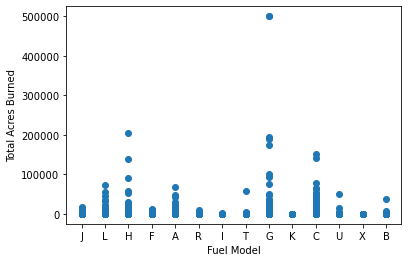

In [16]:
# Linear Regression ML Testing - Relationships
from sklearn.linear_model import LinearRegression
plt.scatter(fire_df.fuel_model, fire_df.total_acres)
plt.xlabel('Fuel Model')
plt.ylabel('Total Acres Burned')
plt.show()

In [17]:
A	Annual grasses (cheat)
B	Dense Chaparral
C	Open pine, grass under
F	Dense Brush (lighter than B)
G	Conifer, Old growth
H	Conifer, Second growth
I	Slash, heavy
J	Slash, medium
K	Slash, thinning, P.C., Scattrd
L	Grass Perennial
R	Hardwood, summer
T	Sagebrush, medium dense
U	Closed canopy pine
X	Non wildland fuel

SyntaxError: invalid syntax (<ipython-input-17-46519e4fe753>, line 1)

In [18]:
# Create DF for Fire Totals By Year
fire_totals = fire_df.groupby('fire_year', as_index=False)['total_acres'].sum()
fire_totals.head(50)

,fire_year,total_acres
0,1990,11367.00
1,1991,7987.00
2,1992,54004.06
3,1993,3010.02
4,1994,64408.78
5,1995,7938.74
6,1996,229636.88
7,1997,2941.04
8,1998,6730.46
9,1999,15387.36


In [19]:
fire_totals.dtypes

fire_year        int64
total_acres    float64
dtype: object

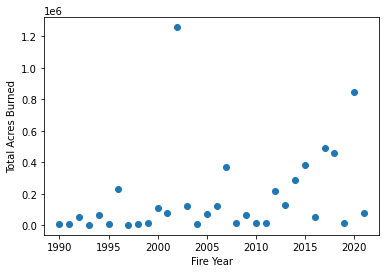

In [20]:
# Linear Regression ML Testing - Relationships
from sklearn.linear_model import LinearRegression
plt.scatter(fire_totals.fire_year, fire_totals.total_acres)
plt.xlabel('Fire Year')
plt.ylabel('Total Acres Burned')
plt.show()

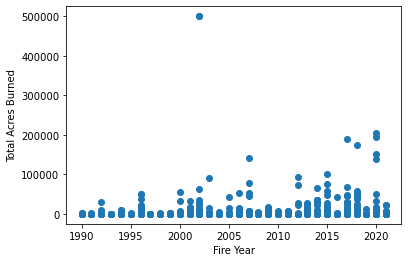

In [21]:
# Linear Regression ML Testing - Relationships
from sklearn.linear_model import LinearRegression
plt.scatter(fire_df.fire_year, fire_df.total_acres)
plt.xlabel('Fire Year')
plt.ylabel('Total Acres Burned')
plt.show()

In [22]:
X = fire_totals.fire_year.values.reshape(-1, 1)

In [23]:
X[:5]

array([[1990],
       [1991],
       [1992],
       [1993],
       [1994]])

In [24]:
X.shape

(32, 1)

In [25]:
y = fire_totals.total_acres

In [26]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(32,)


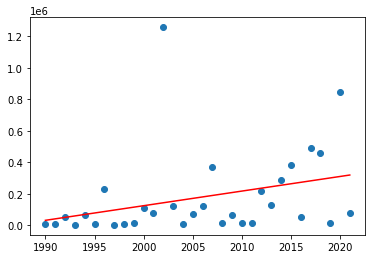

In [27]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [28]:
print(model.coef_)
print(model.intercept_)

[9278.7607588]
-18432556.728643697


In [29]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


In [30]:
# Smote In Progress

from sklearn import linear_model, model_selection, metrics, random_projection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [31]:
label_severity = fire_df['fueltype_num']
train_cols = ['Latitude', 'Longitude', 'county','fire_severity']
train_fire_df = fire_df[train_cols]

In [32]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(train_fire_df, label_severity, test_size= .25)

In [33]:
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num,fire_severity
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,10,2.0
5,2021,51 - Tillamook,Tillamook,37,Nedonna Beach Fire,T2N R10W S17 SWNW,J,Tillamook,8/29/21 13:41,Recreationist,1.08,45.654833,-123.939472,7,8,1.0
12,2021,52 - Astoria,Astoria,24,Tracer,T8N R10W S32 NESE,L,Clatsop,8/25/21 18:50,Miscellaneous,15.00,46.131819,-123.945183,9,5,2.0
32,2021,53 - Forest Grove,Columbia City,54,East Meissner #1,T5N R2W S9 NENW,H,Columbia,9/6/21 15:11,Miscellaneous,1.40,45.939139,-122.942167,5,5,1.0
47,2021,53 - Forest Grove,Columbia City,67,Lewis Rd. #1,T7N R2W S21 NWNW,J,Columbia,5/6/21 10:28,Debris Burning,2.00,46.080889,-122.947861,7,1,1.0


# Predicting Fire Severity With Logistic Regression

In [34]:
fire_df.head()

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num,fire_severity
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,10,2.0
5,2021,51 - Tillamook,Tillamook,37,Nedonna Beach Fire,T2N R10W S17 SWNW,J,Tillamook,8/29/21 13:41,Recreationist,1.08,45.654833,-123.939472,7,8,1.0
12,2021,52 - Astoria,Astoria,24,Tracer,T8N R10W S32 NESE,L,Clatsop,8/25/21 18:50,Miscellaneous,15.00,46.131819,-123.945183,9,5,2.0
32,2021,53 - Forest Grove,Columbia City,54,East Meissner #1,T5N R2W S9 NENW,H,Columbia,9/6/21 15:11,Miscellaneous,1.40,45.939139,-122.942167,5,5,1.0
47,2021,53 - Forest Grove,Columbia City,67,Lewis Rd. #1,T7N R2W S21 NWNW,J,Columbia,5/6/21 10:28,Debris Burning,2.00,46.080889,-122.947861,7,1,1.0


In [35]:
fire_logistic = fire_df.drop(['district', 'unit', "fire_name", "legal", "report_date", ], axis=1)

In [36]:
fire_logistic.head(5)

,fire_year,fire_number,fuel_model,county,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num,fire_severity
4,2021,30,J,Tillamook,Under Invest,74.00,45.566447,-123.627667,7,10,2.0
5,2021,37,J,Tillamook,Recreationist,1.08,45.654833,-123.939472,7,8,1.0
12,2021,24,L,Clatsop,Miscellaneous,15.00,46.131819,-123.945183,9,5,2.0
32,2021,54,H,Columbia,Miscellaneous,1.40,45.939139,-122.942167,5,5,1.0
47,2021,67,J,Columbia,Debris Burning,2.00,46.080889,-122.947861,7,1,1.0


In [37]:
label_encoder = LabelEncoder()
fire_logistic["county_num"] = label_encoder.fit_transform(fire_logistic["county"])
fire_logistic.head(5)

,fire_year,fire_number,fuel_model,county,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num,fire_severity,county_num
4,2021,30,J,Tillamook,Under Invest,74.00,45.566447,-123.627667,7,10,2.0,28
5,2021,37,J,Tillamook,Recreationist,1.08,45.654833,-123.939472,7,8,1.0,28
12,2021,24,L,Clatsop,Miscellaneous,15.00,46.131819,-123.945183,9,5,2.0,3
32,2021,54,H,Columbia,Miscellaneous,1.40,45.939139,-122.942167,5,5,1.0,4
47,2021,67,J,Columbia,Debris Burning,2.00,46.080889,-122.947861,7,1,1.0,4


In [40]:
fire_logistic = fire_logistic.drop(['county', 'fire_number', "general_cause", "fuel_model", "Latitude", "Longitude"], axis=1)

In [41]:
fire_logistic.head(5)

,fire_year,total_acres,fueltype_num,generalCause_num,fire_severity,county_num
4,2021,74.00,7,10,2.0,28
5,2021,1.08,7,8,1.0,28
12,2021,15.00,9,5,2.0,3
32,2021,1.40,5,5,1.0,4
47,2021,2.00,7,1,1.0,4


In [42]:
y = fire_logistic["fire_severity"]
X = fire_logistic.drop(columns="fire_severity")

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(4669, 5)

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=1000,
                                random_state=1)

In [45]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [48]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,2.0,2.0
5,2.0,2.0
6,1.0,1.0
7,1.0,1.0
8,2.0,2.0
9,1.0,1.0


In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9980732177263969
